In [104]:
import pandas as pd
from utils import data_pre, count_nan_values
import re
import matplotlib.pyplot as plt

How the position (backend/ Machine learning..etc) affects the required years of experience needed in order to be an official senior?

We need to deal with columns:           
1-Position              
2-Years of Experience           
3-Seniority level           

In [105]:
POSITION="Position"
YEARS = 'Experience_Years'

df = pd.DataFrame()
df = data_pre(df)

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


In [106]:
SENIORITY = 'Seniority'

In [107]:

def clean_position(df):
    df[POSITION]=df[POSITION].str.strip().str.lower()
    df[POSITION]=df[POSITION]\
    .str.replace('devops manager','DevOps')\
    .str.replace('cloud engineer','DevOps')\
    .str.replace('cloud architect','DevOps')\
    .str.replace('sre','DevOps')\
    .str.replace('devops','DevOps')\
    .str.replace('cloud platform engineer','DevOps')\
    .str.replace('bi consultant sap/ data engineer','Data Scientist')\
    .str.replace('db developer/data analyst','Data Scientist')\
    .str.replace('big data engineer','Data Scientist')\
    .str.replace('bi developer / data engineer','Data Scientist')\
    .str.replace('head of bi','Data Scientist')\
    .str.replace('bi developer / data scientist','Data Scientist')\
    .str.replace('senior data engineer','Data Scientist')\
    .str.replace('bi consultant','Data Scientist')\
    .str.replace('bi it consultant','Data Scientist')\
    .str.replace('bi analyst','Data Scientist')\
    .str.replace('analytics engineer','Data Scientist')\
    .str.replace('data analyst','Data Scientist')\
    .str.replace('dana analyst','Data Scientist')\
    .str.replace('data architect','Data Scientist')\
    .str.replace('product analyst','Data Scientist')\
    .str.replace('researcher/ consumer insights analyst','Data Scientist')\
    .str.replace('data scientist','Data Scientist')\
    .str.replace('data engineer','Data Scientist')\
    .str.replace('working student (qa)','Software Testing')\
    .str.replace('qa engineer','Software Testing')\
    .str.replace('test manager','Software Testing')\
    .str.replace('software developer in test','Software Testing')\
    .str.replace('qa manager','Software Testing')\
    .str.replace('qa automation engineer','Software Testing')\
    .str.replace('qa lead','Software Testing')\
    .str.replace('qa manager','Software Testing')\
    .str.replace('software tester','Software Testing')\
    .str.replace('testmanager','Software Testing')\
    .str.replace('embedded software engineer','Software Engineer')\
    .str.replace('fullstack developer','Software Engineer')\
    .str.replace('full-stack developer','Software Engineer')\
    .str.replace('staff engineer','Software Engineer')\
    .str.replace('fullstack engineer, ну или software engineer','Software Engineer')\
    .str.replace('software architekt','Software Engineer')\
    .str.replace('software architect','Software Engineer')\
    .str.replace('sw architect','Software Engineer')\
    .str.replace('tech lead / full-stack','Software Engineer')\
    .str.replace('tech lead','Software Engineer')\
    .str.replace('tech leader','Software Engineer')\
    .str.replace('sap developer','Software Engineer')\
    .str.replace('sap consultant','Software Engineer')\
    .str.replace('lead software developer','Software Engineer')\
    .str.replace('lead developer','Software Engineer')\
    .str.replace('software engineer','Software Engineer')\
    .str.replace('it operations manager','IT')\
    .str.replace('head of it','IT')\
    .str.replace('support','IT')\
    .str.replace('it consulting','IT')\
    .str.replace('it manager','IT')\
    .str.replace('it spezialist','IT')\
    .str.replace('erp consultant','IT')\
    .str.replace('mobile developer','Mobile Developer')\
    .str.replace('ios developer','Mobile Developer')\
    .str.replace('technical account manager','Product Manager')\
    .str.replace('technical project manager','Product Manager')\
    .str.replace('technical business analyst','Product Manager')\
    .str.replace('project manager','Product Manager')\
    .str.replace('business analyst','Product Manager')\
    .str.replace('engineering team lead','Product Manager')\
    .replace('engineering manager','Product Manager')\
    .replace('manager','Product Manager')\
    .replace('product manager','Product Manager')\
    .str.replace('backend developer','Backend Developer')\
    .str.replace('frontend developer','Frontend Developer')\
    .str.replace('designer (ui/ux)','Designer (UI/UX)')\
    .replace('cto (ceo, cfo)','CTO')\
    .str.replace('cto','CTO')\
    .str.replace('ml engineer','ML Engineer')\
    .str.replace('machine learning engineer','ML Engineer')
    vc= df[POSITION].value_counts()
    mask =df[POSITION].isin(vc.index[vc < 5])
    df.loc[mask, POSITION] = 'Other'
    return df

In [108]:
nulls = [None, 'nan', 'nothing', 'not relevant', 'none']
missing_pos = df[df['Position'].isin(nulls)]
print("There are",len(missing_pos),"missing position")
print("There are",len(df['Position'].unique()),"uniqe position")
print("The unique positions are: ",df['Position'].unique())

There are 7 missing position
There are 167 uniqe position
The unique positions are:  ['software engineer' 'backend developer' 'frontend developer' 'devops'
 'data engineer' 'designer (ui/ux)' 'product manager' 'mobile developer'
 'software architect' 'team lead' 'test manager' 'qa engineer'
 'data scientist' 'hardware engineer' 'engineering manager'
 'analytics engineer' 'localization producer' 'reporting engineer'
 'account managet' 'agile master ' 'ml engineer' 'solution architect'
 'bi consultant' 'fullstack developer' 'nan' 'cloud architect'
 'system administrator' 'project manager' 'network engineer '
 'vp engineering' 'agile coach' 'data science manager' 'scrum master'
 'firmware engineer' 'solutions architect' 'data center manager'
 'c/c++/java developer' 'devops manager' 'tech lead'
 'network administrator' 'security manager' 'consultant data analytics'
 'bi it consultant' 'graphic designer' 'ios developer' 'banker'
 'cloud engineer' 'stuttgart' 'senior program manager'
 'db de

The number of uniqe positions is huge, it needs cleaning.                       
Let's unify similar positions to the same category

In [109]:
df = clean_position(df)


C:\Users\marye\AppData\Local\Temp\ipykernel_12048\2374641571.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[POSITION]=df[POSITION]\


In [110]:
df = df[~df['Position'].isin(nulls)]
print("There are",len(df['Position'].unique()),"uniqe position")
print("The unique positions are: ",df['Position'].unique())

There are 17 uniqe position
The unique positions are:  ['Software Engineer' 'Backend Developer' 'Frontend Developer' 'DevOps'
 'Data Scientist' 'designer (ui/ux)' 'Product Manager' 'Mobile Developer'
 'Other' 'Software Testing' 'ML Engineer' 'system administrator' 'CTO'
 'IT' 'researcher' 'embedded developer' 'qa']


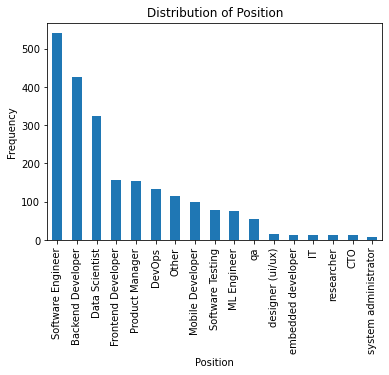

In [111]:
# count the frequency of each category
pos_counts = df['Position'].value_counts()
# plot bar chart
pos_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Distribution of Position')
plt.show()

Years of Experience

In [112]:
missing_yrs = df[df['Experience_Years'].isin(nulls)]
print("There are",len(missing_yrs),"missing years")
print("There are",len(df['Experience_Years'].unique()),"uniqe Experience_Years")
print("The unique years are: ",df['Experience_Years'].unique())

There are 12 missing years
There are 49 uniqe Experience_Years
The unique years are:  ['5' '7' '12' '4' '17' '6' '8' '15' '2' '25' 'nan' '14' '11' '18' '13'
 '30' '10' '3' '40' '26' '23' '9' '19' '20' '5.5' '22' '16' '0.8' '1'
 '1.5' '6.5' '21' '7.5' '2.5' '28' '29' '1,5' '24' '0' '4.5' '27'
 '1 (as qa engineer) / 11 in total' '2,5' '15, thereof 8 as cto' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year']


In [113]:

def clean_years(df):
    df[YEARS]=df[YEARS].str.lower()
    df[YEARS]=df[YEARS]\
    .replace('1,5','1.5')\
    .replace('1 (as qa engineer) / 11 in total','11')\
    .replace('2,5','2.5')\
    .replace('15, thereof 8 as cto','15')\
    .replace('6 (not as a data scientist, but as a lab scientist)','6')\
    .replace('less than year','0.5')\
    .replace('383','5')

    return df


In [114]:
df = clean_years(df)

In [115]:
df = df[~df[YEARS].isin(nulls)]
print("There are",len(df[YEARS].unique()),"uniqe position")
print("The unique years are: ",df[YEARS].unique())

There are 42 uniqe position
The unique years are:  ['5' '7' '12' '4' '17' '6' '8' '15' '2' '25' '14' '11' '18' '13' '30' '10'
 '3' '40' '26' '23' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5' '6.5'
 '21' '7.5' '2.5' '28' '29' '24' '0' '4.5' '27' '31' '3.5' '0.5']


In [116]:
df[YEARS] = df[YEARS].astype('float64')
print(df[YEARS].head(5))

0     5.0
1     7.0
2    12.0
3     4.0
4    17.0
Name: Experience_Years, dtype: float64


In [117]:
mean_years = df[YEARS].mean()
median_years = df[YEARS].median()
std_years = df[YEARS].std()
max_years = df[YEARS].max()
min_years = df[YEARS].min()

# display the computed statistics
print('Mean years: ',mean_years)
print('Median years: ', median_years)
print('Standard deviation of years: ', std_years)
print('Max years: ', max_years)
print('Min years: ', min_years)

Mean years:  8.648134831460673
Median years:  8.0
Standard deviation of years:  5.171138376036199
Max years:  40.0
Min years:  0.0


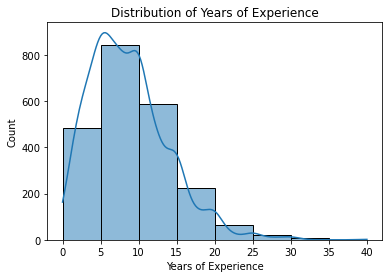

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df[YEARS], kde=True, binwidth=5)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

1-Expectation :
I thins the mean will be around 10-15 years of experience, is the IT field has started growing in the last 15 years.

2-After collecting:
It's clear that the data mean of years of experience is between 5-10 years. 

3-Comparing Data and expectations:
not exact but close to what is expected. ✔

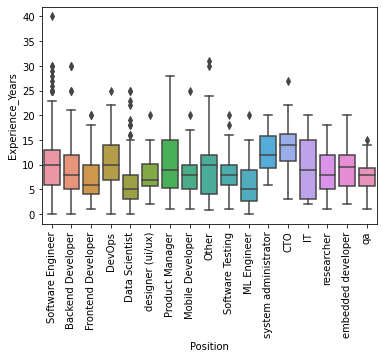

In [119]:
import numpy as np
import matplotlib.pyplot as plt

sns.boxplot(x=POSITION, y=YEARS, data=df)
plt.xticks(rotation=90)
plt.show()

In [120]:
for position in df[POSITION].unique():
    mean_years = df[df[POSITION] == position][YEARS].mean()
    median_years = df[df[POSITION] == position][YEARS].median()
    std_years = df[df[POSITION] == position][YEARS].std()
    # display the computed statistics
    print('Mean years for',position,'is :',mean_years)


Mean years for Software Engineer is : 10.067970204841712
Mean years for Backend Developer is : 9.055294117647058
Mean years for Frontend Developer is : 6.788461538461538
Mean years for DevOps is : 10.157894736842104
Mean years for Data Scientist is : 5.724458204334366
Mean years for designer (ui/ux) is : 8.5625
Mean years for Product Manager is : 10.025974025974026
Mean years for Mobile Developer is : 8.365
Mean years for Other is : 9.516071428571427
Mean years for Software Testing is : 8.25
Mean years for ML Engineer is : 5.710666666666667
Mean years for system administrator is : 12.5
Mean years for CTO is : 14.083333333333334
Mean years for IT is : 9.461538461538462
Mean years for researcher is : 8.76923076923077
Mean years for embedded developer is : 9.428571428571429
Mean years for qa is : 7.767857142857143


Now we will filter on Seniority level, to focus on the needed years of experience for the seniors only

In [121]:
print(df[SENIORITY].unique()) 

['senior' 'lead' 'junior' 'middle' 'head' 'nan' 'no level' 'vp' 'manager'
 'work center manager' 'cto' 'no level ' 'director' 'key'
 'c-level executive manager' 'principal' 'intern' 'student'
 'no idea, there are no ranges in the firm ' 'c-level' 'working student'
 'entry level' 'self employed']


Needs cleaning to be 4 levels only:     
Senior           
Mid level           
Junior          
Student

In [122]:
def clean_senior_col(df):
    meaninigless_values = ['nan','no idea, there are no ranges in the firm','no level','no level ']
    df = df[~df['Seniority'].isin(meaninigless_values)]
    for i, row in df.iterrows():
            if row['Seniority'] in ['principal','cto','manager','director','head','lead','vp','work center manager','c-level executive manager','c-level','key']:
                df.at[i,'Seniority'] = 'senior'
            elif  row['Seniority'] in ['junior','intern','student','working student','entry level']:
                df.at[i,'Seniority'] = 'junior'
    seniority_counts = df['Seniority'].value_counts()
    seniority_counts = seniority_counts[seniority_counts >= 2]
    df = df[df['Seniority'].isin(seniority_counts.index)]
    return df

In [123]:
df = clean_senior_col(df)
print(len(df[SENIORITY]))

2198


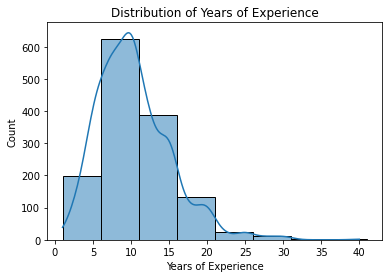

In [124]:
sns.histplot(data=df[df['Seniority'] == 'senior'][YEARS], kde=True, binwidth=5)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

The histogram shows that to be a senior, regardless of field/position most of them it needs at least 10 years

Let's explore more for the needed years per position

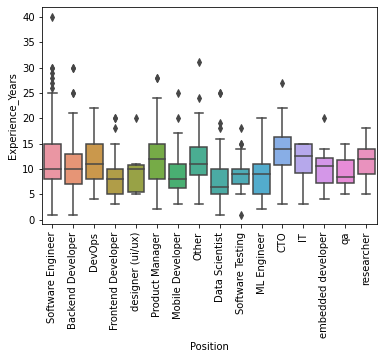

In [125]:
import numpy as np
import matplotlib.pyplot as plt

sns.boxplot(x=POSITION, y=YEARS, data=df[df[SENIORITY] == 'senior'])
plt.xticks(rotation=90)
plt.show()

We can see that there is disparity in the needed years fo expereince to become a senior in each position,                                                                                               
                                                                            
For example, the average needed years for the QA is around 5-6 years,Unlike for the researcher position
where you need at least 8-9 years and on average it around 12 years! That's interesting.   
                                                                                                         
We can categorize the positions into two types .                    
1- 10-15 Needed years which includes :[ SW ,BE, DevOps, Product Manager, Others, CTO,IT,Researcher,Embedded ]                   
2- 5-10 Needed years which includes : [FE, UI/UX designer, Mobile Development, Data Scientist, Software Testing, ML, QA]                


In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# define null and alternative hypotheses
# we assume alpha = 0.05
null_hypothesis = 'There is no significant difference in the means of years of experience across positions'
alternative_hypothesis = 'There is a significant difference in the means of years of experience across positions'

In [128]:
# perform one-way ANOVA test
model = ols('Experience_Years ~ Position', data=df[df[SENIORITY] == 'senior']).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# print ANOVA table
print(anova_table)

# interpret p-value
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print('Reject null hypothesis. ' + alternative_hypothesis)
else:
    print('Cannot reject null hypothesis. ' + null_hypothesis)

                sum_sq      df          F        PR(>F)
Position   3317.342442    15.0  10.367815  6.107754e-24
Residual  29095.522775  1364.0        NaN           NaN
Reject null hypothesis. There is a significant difference in the means of years of experience across positions
